<a href="https://www.kaggle.com/code/lostinworlds/nlp-classifying-goodreads-quotes?scriptVersionId=112256490" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

This is a natural language processing project using the [Quotes From Goodread](https://www.kaggle.com/sanjeetsinghnaik/quotes-from-goodread) 

Two datasets, romance quotes and death quotes, have been merged for this project.
The aim of the project will be to create a model which reviews quotes to decipher if the quote refers to romance or death. 

For clear disclosure, the majority of the coding draws upon the natural language processing coding provided in the course [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) provided by Jose Portilla on Udemy


In [1]:
#import nltk

In [2]:
#nltk.download_shell()

# Import libraries and data
This dataset contains more information but for this exercise the focus will be on only the quotes and main tag column. 

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quotes-from-goodread/science_quotes.csv
/kaggle/input/quotes-from-goodread/poetry_quotes.csv
/kaggle/input/quotes-from-goodread/success_quotes.csv
/kaggle/input/quotes-from-goodread/inspiration_quotes.csv
/kaggle/input/quotes-from-goodread/time_quotes.csv
/kaggle/input/quotes-from-goodread/love_quotes.csv
/kaggle/input/quotes-from-goodread/happiness_quotes.csv
/kaggle/input/quotes-from-goodread/truth_quotes.csv
/kaggle/input/quotes-from-goodread/romance_quotes.csv
/kaggle/input/quotes-from-goodread/all_quotes.csv
/kaggle/input/quotes-from-goodread/death_quotes.csv


In [4]:
romance = pd.read_csv("/kaggle/input/quotes-from-goodread/romance_quotes.csv", index_col= "Unnamed: 0")
death = pd.read_csv("/kaggle/input/quotes-from-goodread/death_quotes.csv", index_col = "Unnamed: 0")

In [5]:
romance.head()

,Quote,Author,Main Tag,Other Tags
0,"“There is no pretending,"" Jace said with absol...","― Cassandra Clare, City of Glass",romance,"[' mortal-instruments, romance, teen-fantasy']"
1,"“He's like a drug for you, Bella.”","― Stephenie Meyer, Eclipse",romance,"[' drug, romance, simile']"
2,"“When someone loves you, the way they talk abo...","― Jess C. Scott, The Intern",romance,"[' desire, emotion, friendship, honesty, imagi..."
3,“I no longer believed in the idea of soul mate...,"― Lisa Kleypas, Blue-Eyed Devil",romance,"[' love, relationships, romance']"
4,"“You can't force love, I realized. It's there ...","― Richelle Mead, Frostbite",romance,"[' fiction, romance']"


In [6]:
death.head()

,Quote,Author,Main Tag,Other Tags
0,"“To the well-organized mind, death is but the ...","― J.K. Rowling, Harry Potter and the Sorcerer'...",death,"[' death, dumbledore, harry, inspirational, ph..."
1,“I'm not afraid of death; I just don't want to...,― Woody Allen,death,"[' death, fear, humor, life']"
2,“Love never dies a natural death. It dies beca...,― Anais Nin,death,"[' death, love']"
3,"“I wish it need not have happened in my time,""...","""So do I,"" said Gandalf, ""and so do all who li...",death,"[' adventuring, death, time']"
4,“I'm the one that's got to die when it's time ...,"― Jimi Hendrix, Jimi Hendrix - Axis: Bold as Love",death,"[' death, life']"


In [7]:
romance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Quote       3000 non-null   object
 1   Author      2751 non-null   object
 2   Main Tag    3000 non-null   object
 3   Other Tags  3000 non-null   object
dtypes: object(4)
memory usage: 117.2+ KB


In [8]:
death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Quote       3000 non-null   object
 1   Author      2822 non-null   object
 2   Main Tag    3000 non-null   object
 3   Other Tags  3000 non-null   object
dtypes: object(4)
memory usage: 117.2+ KB


## Reviewing the Main Tag 


In [9]:
romance["Main Tag"].value_counts()

romance    3000
Name: Main Tag, dtype: int64

In [10]:
death["Main Tag"].value_counts()

death    3000
Name: Main Tag, dtype: int64

# Creating the quotes datasets
## Merge datasets

Create a new category to note source of each dataset and merge


In [11]:
quotes = pd.concat([romance, death])

In [12]:
quotes.drop(["Author", "Other Tags"], axis = 1, inplace = True)

## Removing null data 
There should be no null data given that the nulls in both datasets were related to Author. 

In [13]:
quotes.dropna(how='any', inplace = True)

# Review quotes dataset

In [14]:
quotes.head()

,Quote,Main Tag
0,"“There is no pretending,"" Jace said with absol...",romance
1,"“He's like a drug for you, Bella.”",romance
2,"“When someone loves you, the way they talk abo...",romance
3,“I no longer believed in the idea of soul mate...,romance
4,"“You can't force love, I realized. It's there ...",romance


In [15]:
quotes.describe()

,Quote,Main Tag
count,6000,6000
unique,5969,2
top,"“Darkling I listen; and, for many a time",romance
freq,3,3000


In [16]:
quotes.groupby("Main Tag").describe()

Quote                                           
         count unique                            top freq
Main Tag                                                 
death     3000   2991  “But at my back I always hear    3
romance   3000   2999          “What are you doing?”    2

In [17]:
quotes["length"] = quotes["Quote"].apply(len)

## Min and Max data

In [18]:
quotes.length.describe()

count    6000.000000
mean      175.126167
std       180.969793
min         4.000000
25%        63.750000
50%       117.000000
75%       221.000000
max      1903.000000
Name: length, dtype: float64

In [19]:
quotes[quotes["length"] ==4]["Quote"].iloc[0]

'“MOM'

In [20]:
quotes[quotes["length"] ==1827]["Quote"].iloc[0]

"“Why should I give up revenge? On behalf of what? Moral principles? And what of the higher order of things, in which evil deeds are punished? For you, a philosopher and ethicist, an act of revenge is bad, disgraceful, unethical and illegal. But I ask: where is the punishment for evil? Who has it and grants access? The Gods, in which you do not believe? The great demiurge-creator, which you decided to replace the gods with? Or maybe the law? [...] I know what evil is afraid of. Not your ethics, Vysogota, not your preaching or moral treaties on the life of dignity. Evil is afraid of pain, mutilation, suffering and at the end of the day, death! The dog howls when it is badly wounded! Writhing on the ground and growls, watching the blood flow from its veins and arteries, seeing the bone that sticks out from a stump, watching its guts escape its open belly, feeling the cold as death is about to take them. Then and only then will evil begin to beg, 'Have mercy! I regret my sins! I'll be goo

## Data Visualisation

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

Text(0.5, 0.98, 'Distribution of length data')

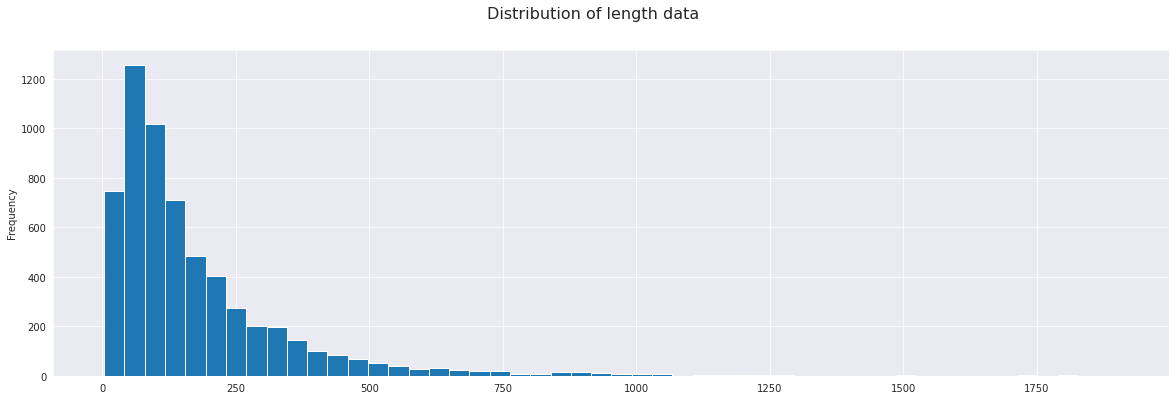

In [22]:
plt.figure(figsize=(20,6))
quotes["length"].plot(bins =50, kind ="hist")
plt.suptitle("Distribution of length data", fontsize = 16)

In [23]:
quotes["length"].describe()

count    6000.000000
mean      175.126167
std       180.969793
min         4.000000
25%        63.750000
50%       117.000000
75%       221.000000
max      1903.000000
Name: length, dtype: float64

As the below graphs show, based on the length of the data, it is unclear whether a quote will be referring to romance or death. 

Text(0.5, 0.98, 'Distribution of length data separated by Main tag')

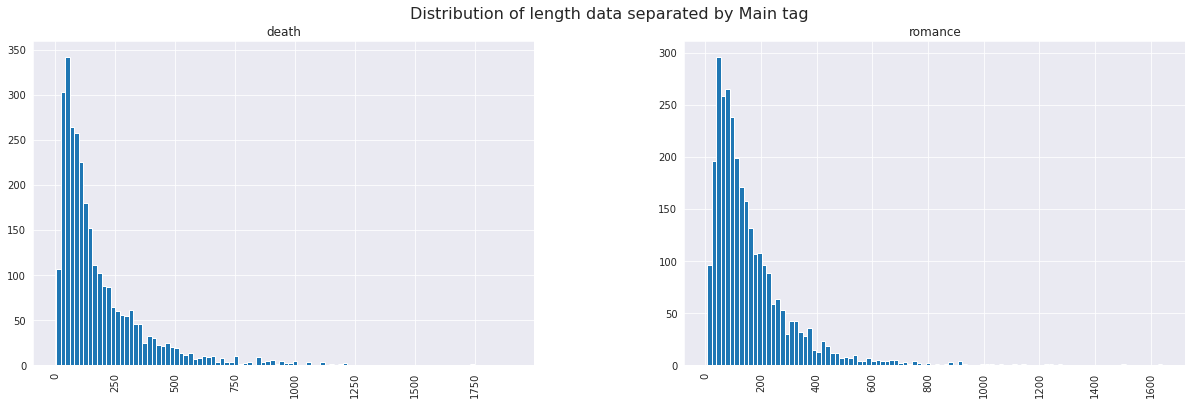

In [24]:
quotes.hist(column = "length", by = "Main Tag", bins = 100, figsize=(20,6))
plt.suptitle("Distribution of length data separated by Main tag", fontsize = 16)

Text(0.5, 0.98, 'Box plot of length data separated by Main tag')

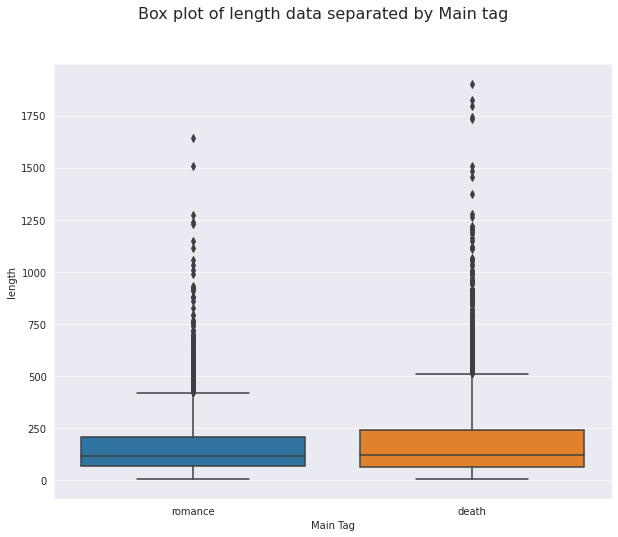

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "Main Tag", y = "length", data = quotes)
plt.suptitle("Box plot of length data separated by Main tag", fontsize = 16)

# Text preprocessing

In [26]:
import string
from nltk.corpus import stopwords

In [27]:
def text_process(quote):
    nopunc = [char for char in quote if char not in string.punctuation]
    
    nopunc = "".join(nopunc)
    
    return[word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [28]:
quotes.head()

,Quote,Main Tag,length
0,"“There is no pretending,"" Jace said with absol...",romance,158
1,"“He's like a drug for you, Bella.”",romance,34
2,"“When someone loves you, the way they talk abo...",romance,98
3,“I no longer believed in the idea of soul mate...,romance,369
4,"“You can't force love, I realized. It's there ...",romance,194


In [29]:
quotes["Quote"].head().apply(text_process)

0    [“There, pretending, Jace, said, absolute, cla...
1                           [“Hes, like, drug, Bella”]
2    [“When, someone, loves, way, talk, different, ...
3    [“I, longer, believed, idea, soul, mates, love...
4    [“You, cant, force, love, realized, isnt, youv...
Name: Quote, dtype: object

In [30]:
quotes.head()

,Quote,Main Tag,length
0,"“There is no pretending,"" Jace said with absol...",romance,158
1,"“He's like a drug for you, Bella.”",romance,34
2,"“When someone loves you, the way they talk abo...",romance,98
3,“I no longer believed in the idea of soul mate...,romance,369
4,"“You can't force love, I realized. It's there ...",romance,194


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(quotes["Quote"])

print(len(bow_transformer.vocabulary_))

20970


## Bag-of-words Counts

In [33]:
quotes_bow = bow_transformer.transform(quotes["Quote"])

## Sparse Matrix

In [34]:
print("Shape of Sparse Matrix:", quotes_bow.shape)
print('Amount of Non-Zero occurences: ', quotes_bow.nnz)

Shape of Sparse Matrix: (6000, 20970)
Amount of Non-Zero occurences:  93584


In [35]:
sparsity = (100.0 * quotes_bow.nnz / (quotes_bow.shape[0] * quotes_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity, 5)))

sparsity: 0.07438


# TfidfTransformer

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

In [37]:
tfidf_transformer = TfidfTransformer().fit(quotes_bow)

In [38]:
quotes_tfidf = tfidf_transformer.transform(quotes_bow)

In [39]:
tfidf_transformer.idf_[bow_transformer.vocabulary_["difficult"]]

6.703949127435522

# Modelling 

## Train and test data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
quote_train, quote_test, group_train, group_test = train_test_split(quotes["Quote"], quotes["Main Tag"], test_size=.2, random_state= 360)

## Model 1 - MultinomialNB

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
romance_death = MultinomialNB().fit(quotes_tfidf, quotes["Main Tag"])

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=text_process)),
    ("tifdi", TfidfTransformer()),
    ("Classifer", MultinomialNB())
])

In [46]:
pipeline.fit(quote_train, group_train )

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbec6d37560>)),
                ('tifdi', TfidfTransformer()), ('Classifer', MultinomialNB())])

In [47]:
predictions = pipeline.predict(quote_test)

## Model 2 - RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=text_process)),
    ("tifdi", TfidfTransformer()),
    ("Classifer", RandomForestClassifier())
])

In [50]:
pipeline.fit(quote_train, group_train )

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbec6d37560>)),
                ('tifdi', TfidfTransformer()),
                ('Classifer', RandomForestClassifier())])

In [51]:
predictions2 = pipeline.predict(quote_test)

## Evaluations of data

In [52]:
from sklearn.metrics import classification_report

In [53]:
print("Model 1 - MultinomialNB")
print(classification_report(group_test, predictions))

Model 1 - MultinomialNB
              precision    recall  f1-score   support

       death       0.73      0.84      0.78       574
     romance       0.83      0.72      0.77       626

    accuracy                           0.78      1200
   macro avg       0.78      0.78      0.77      1200
weighted avg       0.78      0.78      0.77      1200



In [54]:
print("Model 2 - RandomForestClassifier")
print(classification_report(group_test, predictions2))

Model 2 - RandomForestClassifier
              precision    recall  f1-score   support

       death       0.86      0.71      0.78       574
     romance       0.77      0.89      0.83       626

    accuracy                           0.80      1200
   macro avg       0.81      0.80      0.80      1200
weighted avg       0.81      0.80      0.80      1200



# Conclusion

As a first attempt in creating a NLP, an accuracy of 70-80% is a delight. It is also clear that future improvements can be made. For instance through the future utilisation of NLTK library. 